Titanic Project
Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

1. This is a classification problem.
2. Convert object into float.
3. Check for the relevent attributes.

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df['Sex']= df['Sex'].replace({'male':0,'female':1})

In [26]:
df.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [52]:
df.head(30)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,C


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
lab_enc= LabelEncoder()

In [13]:
df2=lab_enc.fit_transform(df['Embarked'])
df2

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [14]:
df['Embarked']=df2
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,0


In [19]:
df=df.drop(columns=('Name'))

In [20]:
df=df.drop(columns=('Ticket'))

In [21]:
df=df.drop(columns=('Cabin'))

In [22]:
df=df.drop(columns=('Fare'))

Name, Ticket, Cabin and fare has nothing to do with the sinking of ship.

In [23]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.000000,1,0,2
1,2,1,1,1,38.000000,1,0,0
2,3,1,3,1,26.000000,0,0,2
3,4,1,1,1,35.000000,1,0,2
4,5,0,3,0,35.000000,0,0,2
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,2
887,888,1,1,1,19.000000,0,0,2
888,889,0,3,1,29.699118,1,2,2
889,890,1,1,0,26.000000,0,0,0


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,3.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     891 non-null    int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 52.3 KB


In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

<AxesSubplot:>

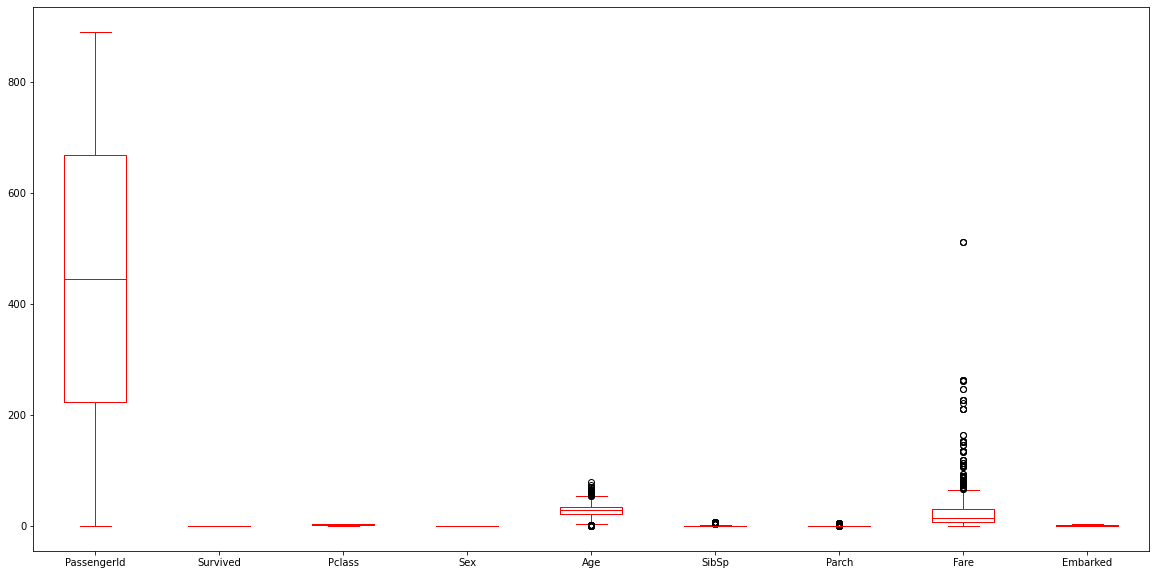

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df.plot(kind='box', figsize=(20,10), color='r')

In [ ]:
##Outliers can be seen in age, sibsp and parch

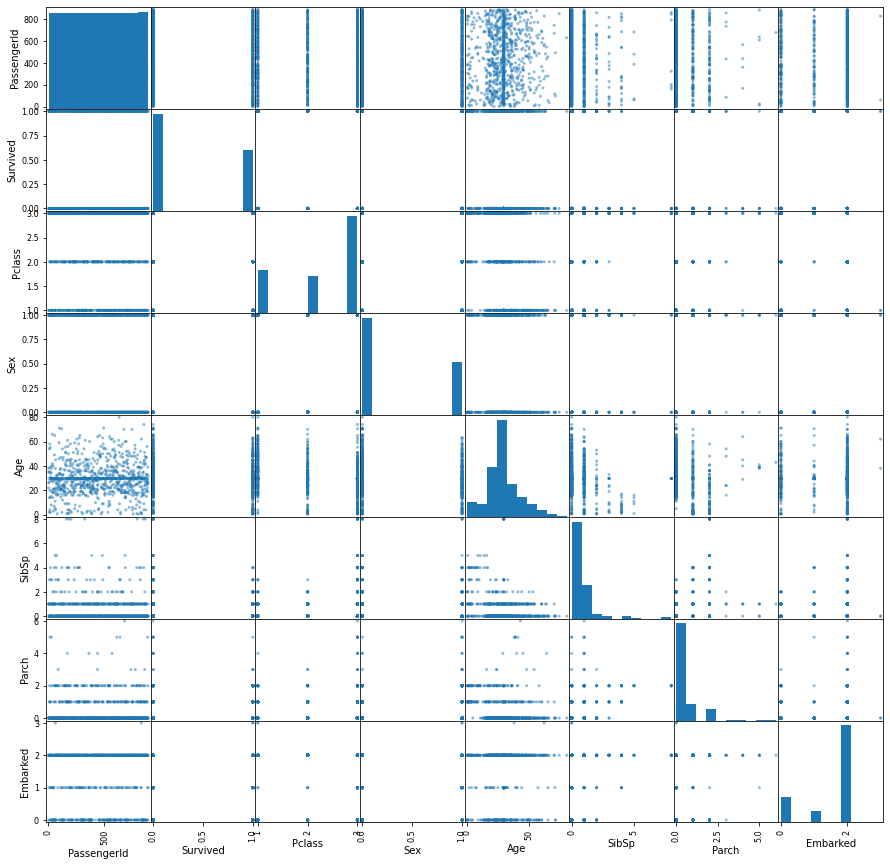

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15,15))
plt.show()

In [28]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.013083
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,-0.163517
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,0.157112
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,-0.104057
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,-0.022239
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.066654
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.038322
Embarked,0.013083,-0.163517,0.157112,-0.104057,-0.022239,0.066654,0.038322,1.000000


<AxesSubplot:>

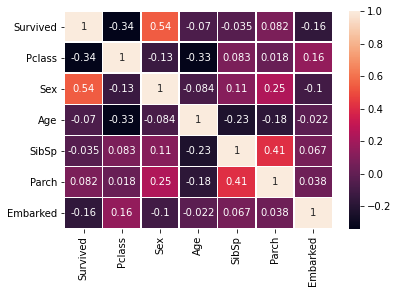

In [70]:
sns.heatmap(df.corr(),annot=True, linewidth=0.5)

In [71]:
##the problem is classification problem
##Not much relation can be seen between the attributes.
##Survived is target attribute


In [29]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [94]:
age_high=(q3.Age+(1.5*iqr.Age))
print(age_high)
age_low=(q1.Age-(1.5*iqr.Age))
print(age_low)
SibSp_high=(q3.SibSp+(1.5*iqr.SibSp))

54.5
2.5


In [95]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.000000,1,0,2
1,2,1,1,1,38.000000,1,0,0
2,3,1,3,1,26.000000,0,0,2
3,4,1,1,1,35.000000,1,0,2
4,5,0,3,0,35.000000,0,0,2
5,6,0,3,0,29.699118,0,0,1
6,7,0,1,0,54.000000,0,0,2
12,13,0,3,0,20.000000,0,0,2
17,18,1,2,0,29.699118,0,0,2
18,19,0,3,1,31.000000,1,0,2


In [96]:
I1=np.where(df['Age']>age_high)
I1

(array([], dtype=int64),)

In [97]:
I2=np.where(df['Age']<age_low)
I2

(array([], dtype=int64),)

In [98]:
df=df.drop(df.index[I1])

In [99]:
I3=np.where(df['SibSp']>SibSp_high)
I3

(array([], dtype=int64),)

In [101]:
data=df.reset_index()

<AxesSubplot:>

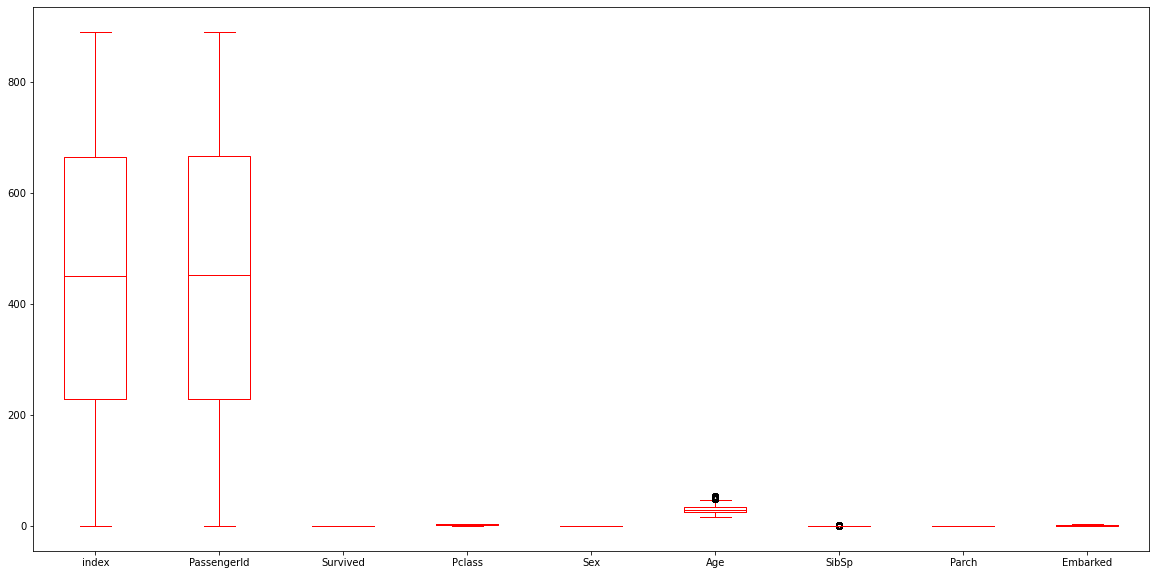

In [102]:
data.plot(kind='box', figsize=(20,10), color='r')

In [103]:
x=data.drop(columns=['Survived'])
y=data['Survived']

In [104]:
x1=x.drop(columns=['index'])

In [114]:
x_1=x1.drop(columns=['PassengerId'])

In [106]:
x_1=x1.drop(columns=['Parch'])

<AxesSubplot:>

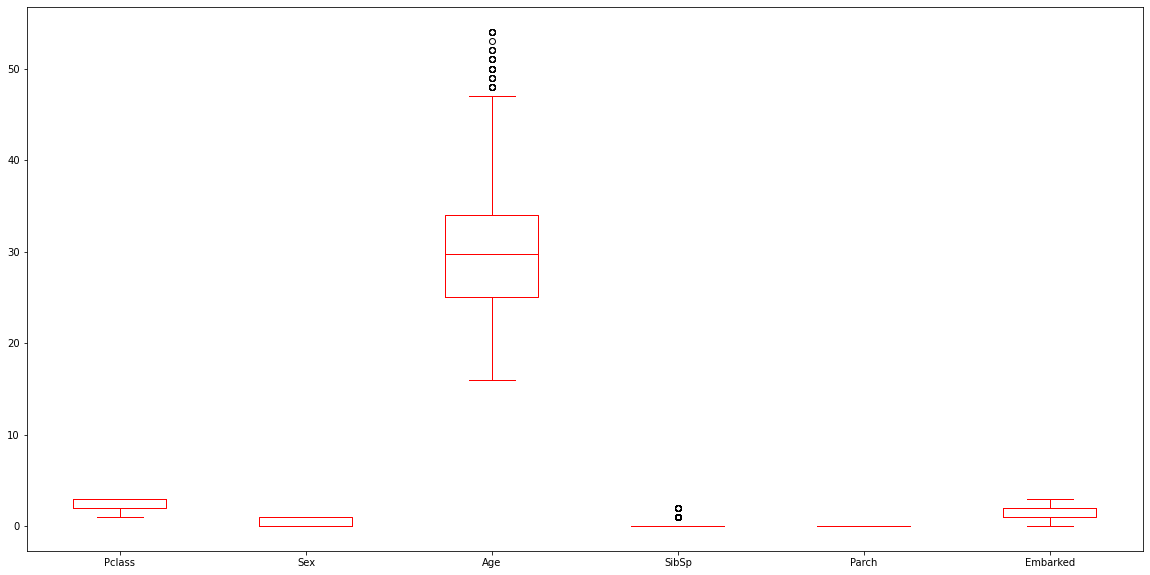

In [115]:
x_1.plot(kind='box', figsize=(20,10), color='r')

In [108]:
x_1.head(30)

,PassengerId,Pclass,Sex,Age,SibSp,Embarked
0,1,3,0,22.000000,1,2
1,2,1,1,38.000000,1,0
2,3,3,1,26.000000,0,2
3,4,1,1,35.000000,1,2
4,5,3,0,35.000000,0,2
5,6,3,0,29.699118,0,1
6,7,1,0,54.000000,0,2
7,13,3,0,20.000000,0,2
8,18,2,0,29.699118,0,2
9,19,3,1,31.000000,1,2


In [109]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_1)
x_scaled

array([[-1.76502067,  0.78967528, -0.61949328, -0.98101314,  1.59521529,
         0.5765688 ],
       [-1.76107688, -1.63506974,  1.6142225 ,  0.91372825,  1.59521529,
        -2.02210916],
       [-1.75713308,  0.78967528,  1.6142225 , -0.5073278 , -0.48880303,
         0.5765688 ],
       ...,
       [ 1.73312655, -1.63506974,  1.6142225 , -1.33627716, -0.48880303,
         0.5765688 ],
       [ 1.74101414, -1.63506974, -0.61949328, -0.5073278 , -0.48880303,
        -2.02210916],
       [ 1.74495794,  0.78967528, -0.61949328,  0.20320023, -0.48880303,
        -0.72277018]])

In [173]:
x_1_train, x_1_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=323)

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]

In [175]:
vif["features"]=x_1.columns
vif

,vif,features
0,1.023149,Pclass
1,1.216951,Sex
2,1.089853,Age
3,1.127809,SibSp
4,1.061599,Parch
5,1.050616,Embarked


In [116]:
##no multicolinearity

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,auc, classification_report
log_reg=LogisticRegression()
log_reg.fit(x_1_train,y_train)

LogisticRegression()

In [177]:
y_pred=log_reg.predict(x_1_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7911392405063291

In [178]:
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

array([[85, 11],
       [22, 40]], dtype=int64)

In [179]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        96
           1       0.78      0.65      0.71        62

    accuracy                           0.79       158
   macro avg       0.79      0.77      0.77       158
weighted avg       0.79      0.79      0.79       158



In [180]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7652889784946236

In [183]:
from sklearn.neighbors import KNeighborsClassifier

In [184]:
knn=KNeighborsClassifier()
knn.fit(x_1_train,y_train)

KNeighborsClassifier()

In [185]:
y_pred=knn.predict(x_1_test)

In [186]:
cfm=confusion_matrix(y_test, y_pred)
cfm

array([[83, 13],
       [24, 38]], dtype=int64)

In [150]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        96
           1       0.75      0.61      0.67        62

    accuracy                           0.77       158
   macro avg       0.76      0.74      0.75       158
weighted avg       0.76      0.77      0.76       158



In [187]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7387432795698925

In [ ]:
##accuracy has been decreased to 77%

In [188]:
from sklearn.model_selection import KFold, cross_val_score
cross_val_score(knn,x_scaled,y,cv=5).mean()

0.8209348831396076

In [193]:
##accuracy increase to 82%, so knn is the appropriate method.

In [196]:
import pickle

In [197]:
filename='Titanic.pickle'
pickle.dump(knn,open(filename,'wb'))